In [1]:
from analyze_factor_note_init import AnalyzeFactorNotes as Note

---

### 初始化条件

In [2]:
factor_name = 'impluse'
start_date = 20100101
end_date = 20210101
med_tf = False
z_score_tf = False
demean_tf = False
sample_num = None
sample_every_date_tf = False

In [3]:
note = Note(factor_name, start_date, end_date,
                med_tf, z_score_tf, demean_tf,
                sample_num,sample_every_date_tf
            )

#### 加载数据

In [4]:
note.load_data()

---

#### 查看因子相关信息

##### - 因子定义及计算公式

因子名称：冲量因子(impluse),m2v2-m1v1  
因子定义： t时刻的价格速度* t时刻的价格 - t-delta_t时刻的价格速度* t-delta_t时刻的价格
$$
PriceSpeed_t = \frac{Price_t - Price_{t-1}}{Price_{t-1}}   
$$

$$
factor = PriceSpeed_t * Price_t - PriceSpeed_{t-\delta t} * Price_{t-\delta t}
$$

#### -因子信息

In [5]:
factor_info = note.get_factor_info()
for k,v in factor_info.items():
    print(k,':',v)

name : impluse
fields : ['close']
other_dIepend_factors : ['price_speed_change']
calc_params : {'v_period': 1, 'delta_period': 20}
save_h5_path : F:\factor_lab_res\prepared_data\factor_data.h5
value_range : [-22347.188, 19155.43]
process_suggest_method : standardization


---

### 因子分析

In [7]:
note.get_data_for_analysis()

In [8]:
zy_fa = note.analysis_factor()

#### 绘制factor-return散点图

- 全部数据

factor vs forward_return_period_1, normal slope: 2.3640892334224155e-06
factor vs forward_return_period_1, normal intercept: 0.00047047428510054785
factor vs forward_return_period_1, rank slope: 0.014077722517392855
factor vs forward_return_period_1, rank intercept: 3476089.83585509


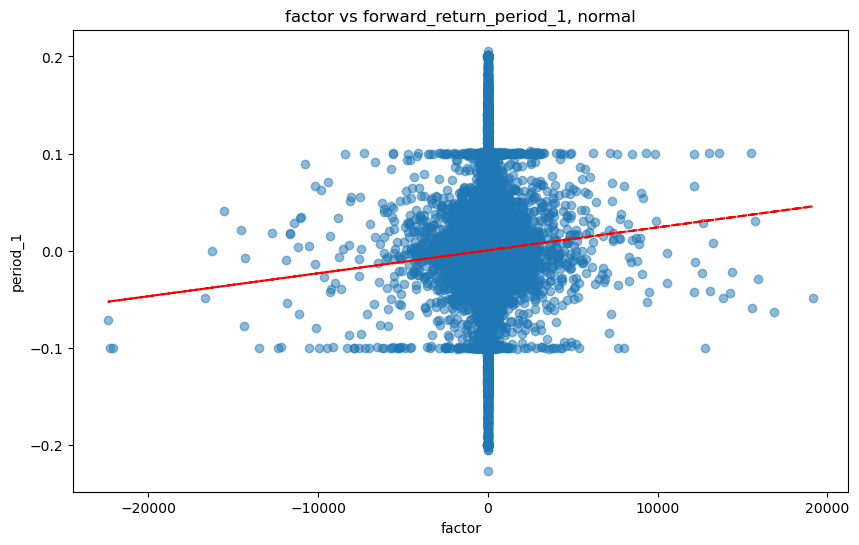

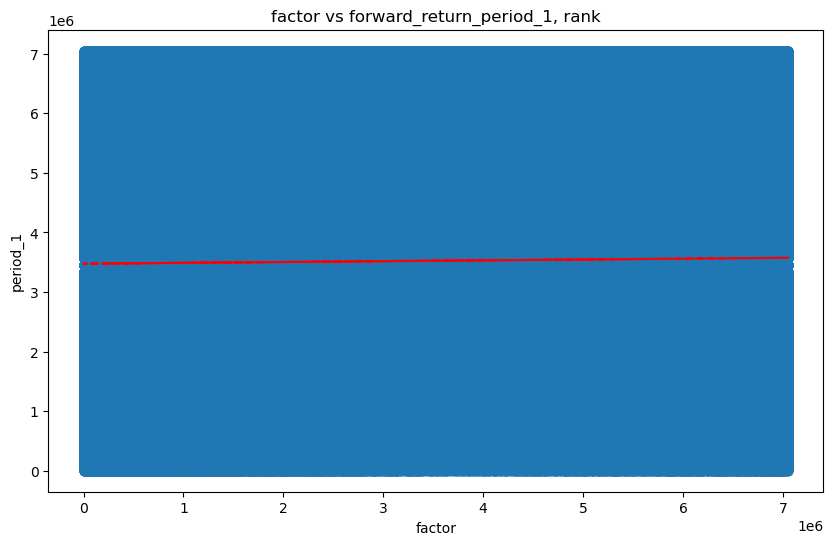

In [9]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=None)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=None)

- 抽样100000

factor vs forward_return_period_1, normal slope: -5.271886690786473e-06
factor vs forward_return_period_1, normal intercept: 0.0006104987768825448
factor vs forward_return_period_1, rank slope: 0.005375268551074071
factor vs forward_return_period_1, rank intercept: 4973.620969610356


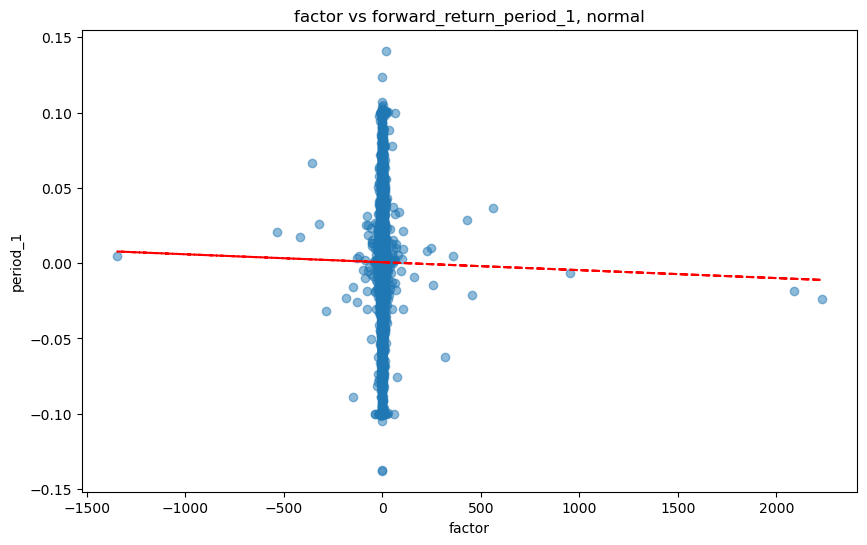

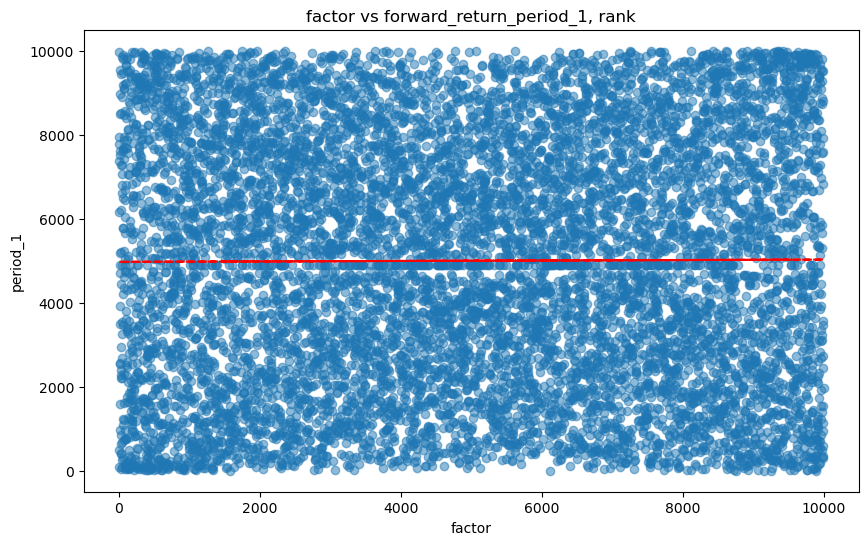

In [10]:
# normal
zy_fa.plot_scatter_and_regression(periods_list=[1,],sample_num=10000)
# rank
zy_fa.plot_scatter_and_regression(periods_list=[1,],rank_tf=True,sample_num=10000)

### 绘制因子分布图

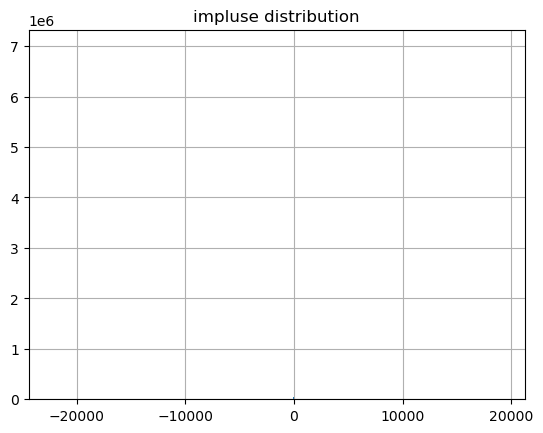

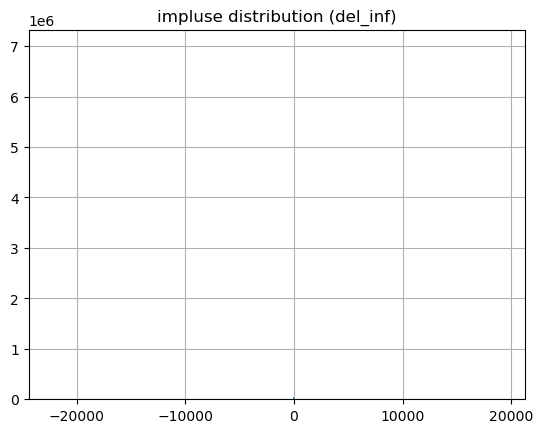

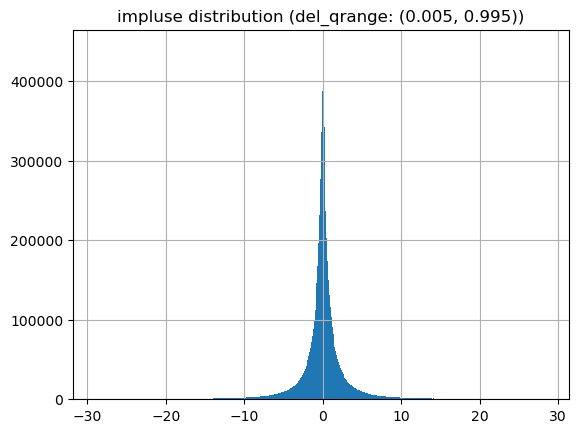

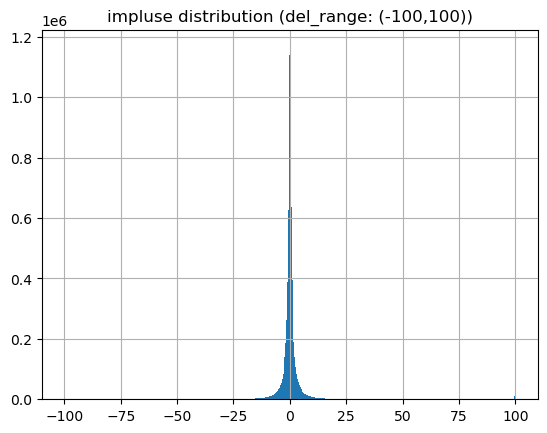

In [11]:
# 原始因子分布图
zy_fa.plot_factor_hist()
# 剔除inf后的因子分布图
zy_fa.plot_factor_hist(del_inf=True)
# 截取分位数qrange的因子分布图
zy_fa.plot_factor_hist(del_qrange=(0.005,0.995))
# 截取给定range的因子分布图
zy_fa.plot_factor_hist(del_range=(-100,100))

---

#### IC

#### 打印因子ic分析结果

In [12]:
analyze_ic_res = zy_fa.analyze_ic_res()
print('analyze_ic_res:\n',analyze_ic_res)


analyze_ic_res:
               period_1  period_2  period_3  period_5  period_8 period_13  \
norm_ic_mean  0.002332  0.001288   0.00131  0.000184  0.000522  0.000495   
norm_ic_std   0.026147  0.025437  0.024759   0.02415  0.024149  0.023539   
norm_ir       0.089174  0.050637  0.052919  0.007626  0.021623  0.021014   
norm_abs_ic   0.005325  0.003079  0.003232  0.003414  0.004432  0.003049   
rank_ic_mean -0.003429 -0.007647  -0.00707 -0.013741 -0.008246 -0.004533   
rank_ic_std   0.092492  0.088885  0.087453  0.087402  0.085017  0.083284   
rank_ir       -0.03707 -0.086031 -0.080846 -0.157219 -0.096994 -0.054432   
rank_abs_ic   0.013796  0.011727  0.016262  0.007566  0.010478   0.01856   

             period_21 period_34 period_55 period_89 period_144 period_233  \
norm_ic_mean -0.000173 -0.000077 -0.000169 -0.000077  -0.000368  -0.000276   
norm_ic_std     0.0231  0.022767  0.022844  0.022021   0.022281   0.021501   
norm_ir      -0.007503 -0.003397 -0.007393 -0.003476  -0.016534 

---

#### 绘制norm_ic的时序图

<Figure size 640x480 with 0 Axes>

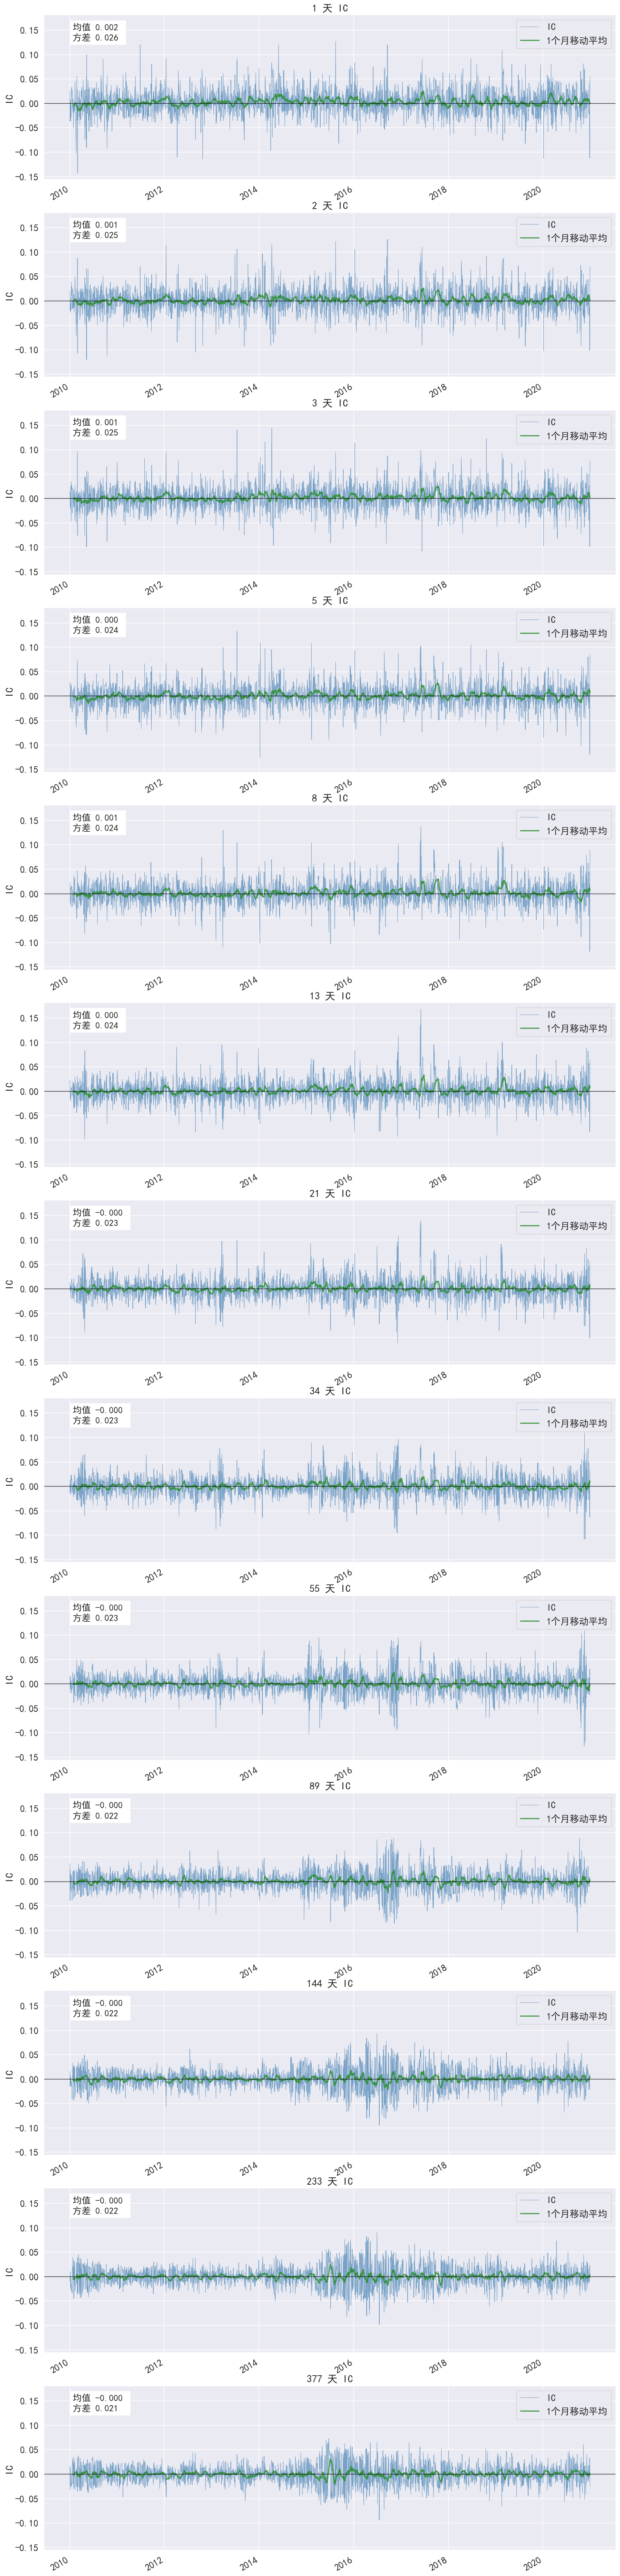

In [13]:
zy_fa.plot_norm_ic_ts()

---

#### 绘制rank_ic的时序图

<Figure size 640x480 with 0 Axes>

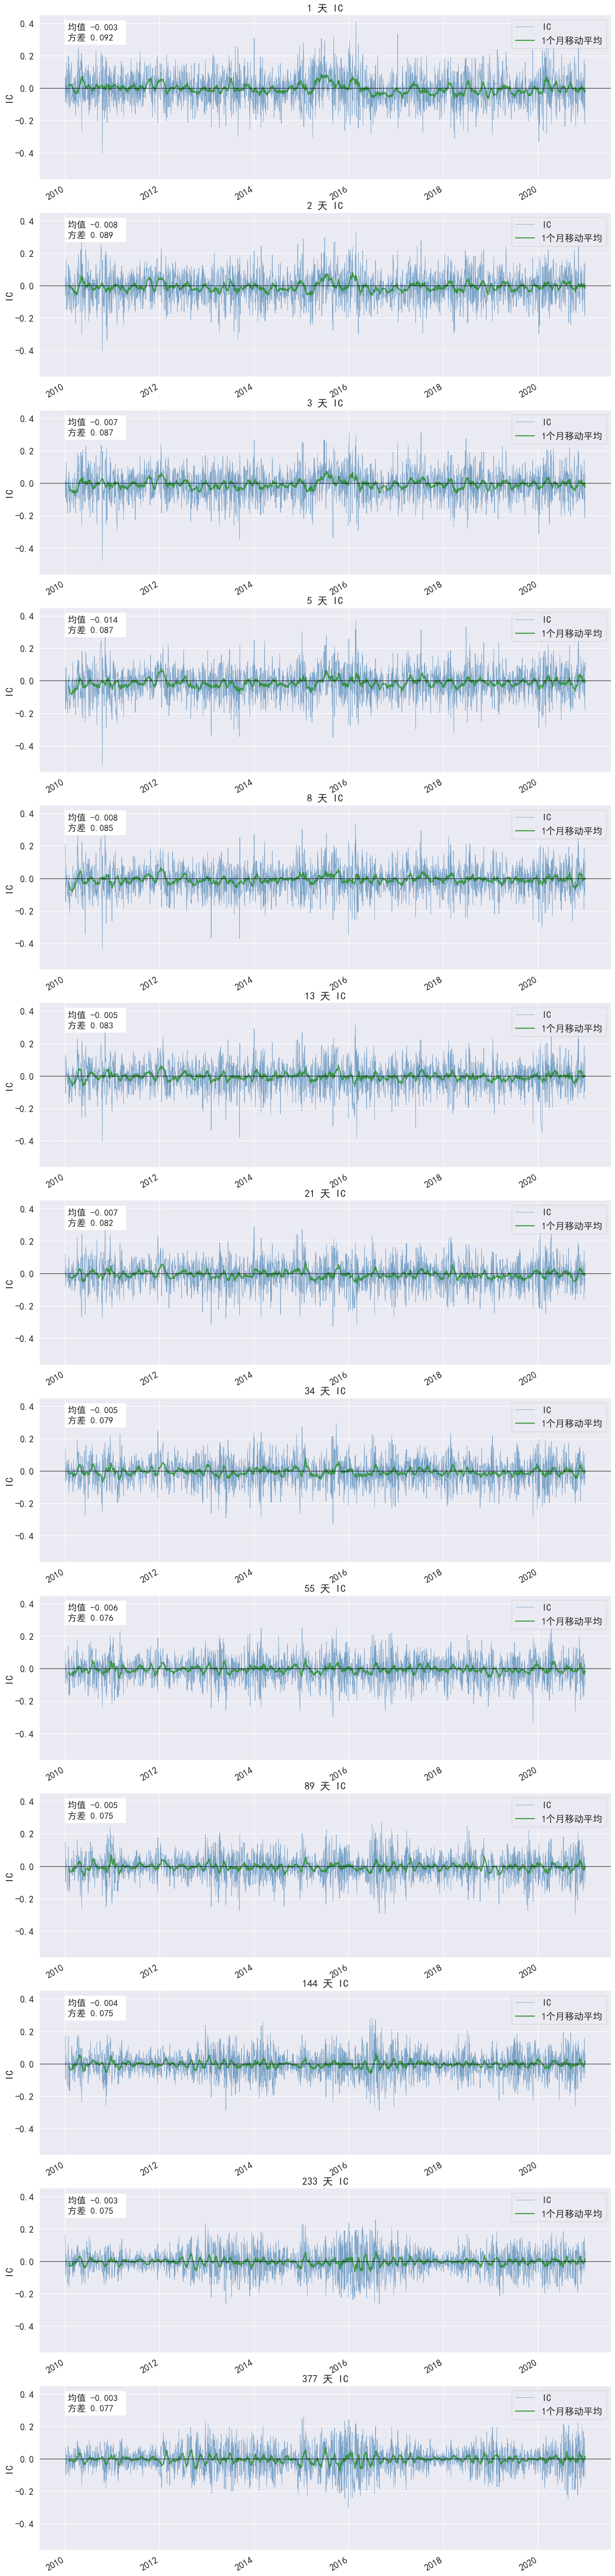

In [14]:
zy_fa.plot_rank_ic_ts()